In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plot_utils import feature_heatmap, feat_scatter, groupby_coord, get_bin_range, binned_feat
from resources import lang_LH_rois

## Settings

In [2]:
fname = '../../data/brain-lang-data_participant_20230728.csv'
df = pd.read_csv(fname)

save = False
PLOTDIR = None # Where to store plots
CSVDIR = None # Where to store accompanying CSV files

## Figure 5A

In [3]:
# Define the linguistic properties (features) of interest
feats_of_interest = [
    'item_id',
    'response_target', # BOLD response

    # Linguistic properties
    'log-prob-gpt2-xl_mean', 
    'rating_gram_mean',
    'rating_sense_mean',
    
    'rating_others_thoughts_mean',
    'rating_physical_mean',
    'rating_places_mean',

    'rating_valence_mean',
    'rating_arousal_mean',

    'rating_imageability_mean',

    'rating_frequency_mean',
    'rating_conversational_mean',

    ]

In [4]:
# Constrain to the lang_LH_netw ROI and take the relevant columns
df_roi = df.query('roi == "lang_LH_netw"')[feats_of_interest]

# Obtain a version for just the n=1,000 baseline sentences
df_roi_B = df.query('roi == "lang_LH_netw" and cond == "B"')[feats_of_interest]

# Average across participants
df_roi_mean = df_roi.groupby('item_id').mean().reset_index(drop=True)
df_roi_B_mean = df_roi_B.groupby('item_id').mean().reset_index(drop=True)


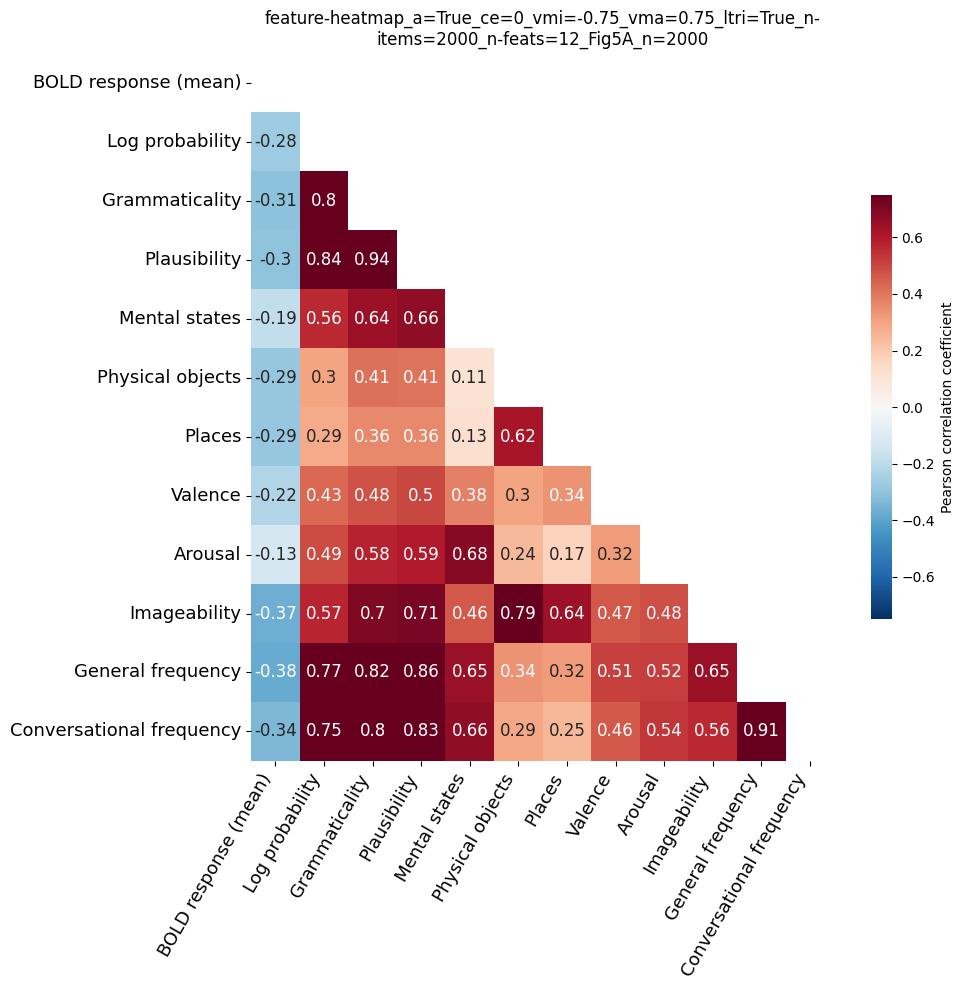

In [5]:
# Correlation of linguistic properties across n=2,000 sentences (drive, suppress, baseline)
feature_heatmap(df_feats=df_roi_mean,
                fname_save='Fig5A_n=2000',
                save=save,
                lower_triu=True,
                vmin=-0.75,
                vmax=0.75,
                annot=True,
                PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                )

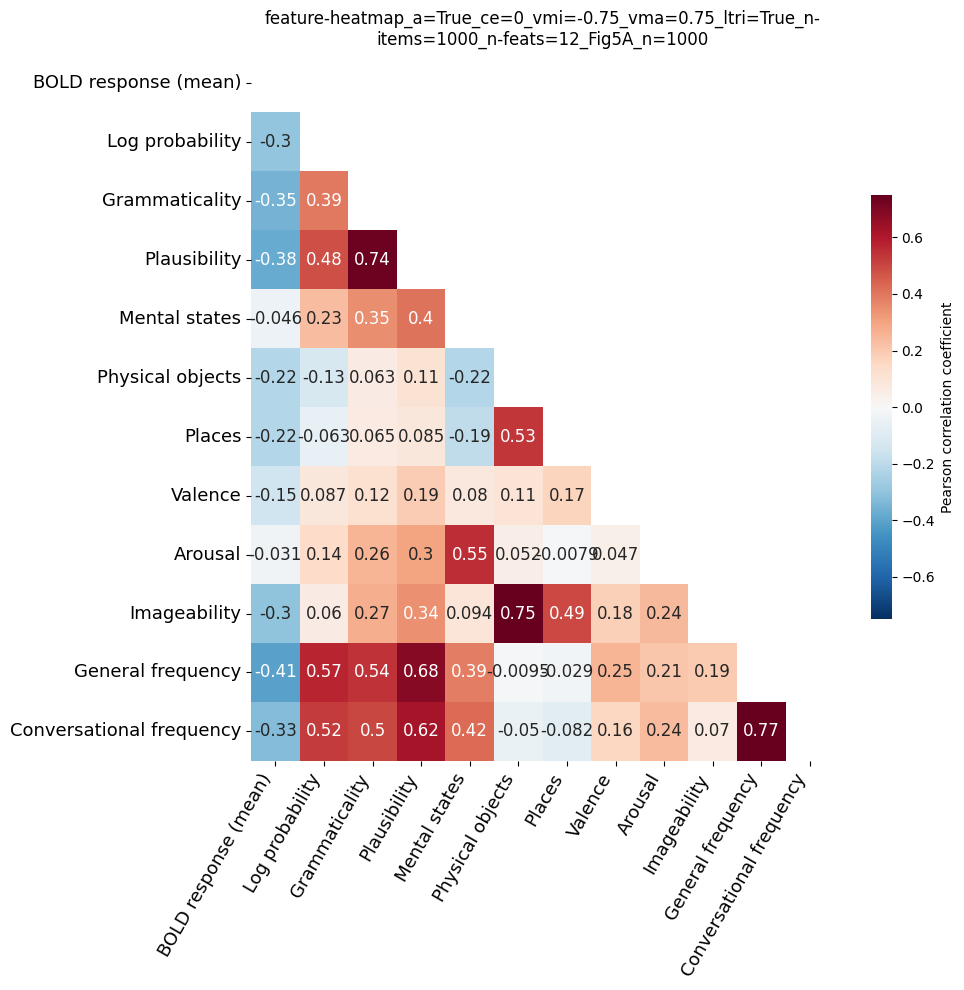

In [6]:
# Correlation of linguistic properties across n=1,000 sentences (baseline set) 
feature_heatmap(df_feats=df_roi_B_mean,
                fname_save='Fig5A_n=1000',
                save=save,
                lower_triu=True,
                vmin=-0.75,
                vmax=0.75,
                annot=True,
                PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                )

## Figure 5B

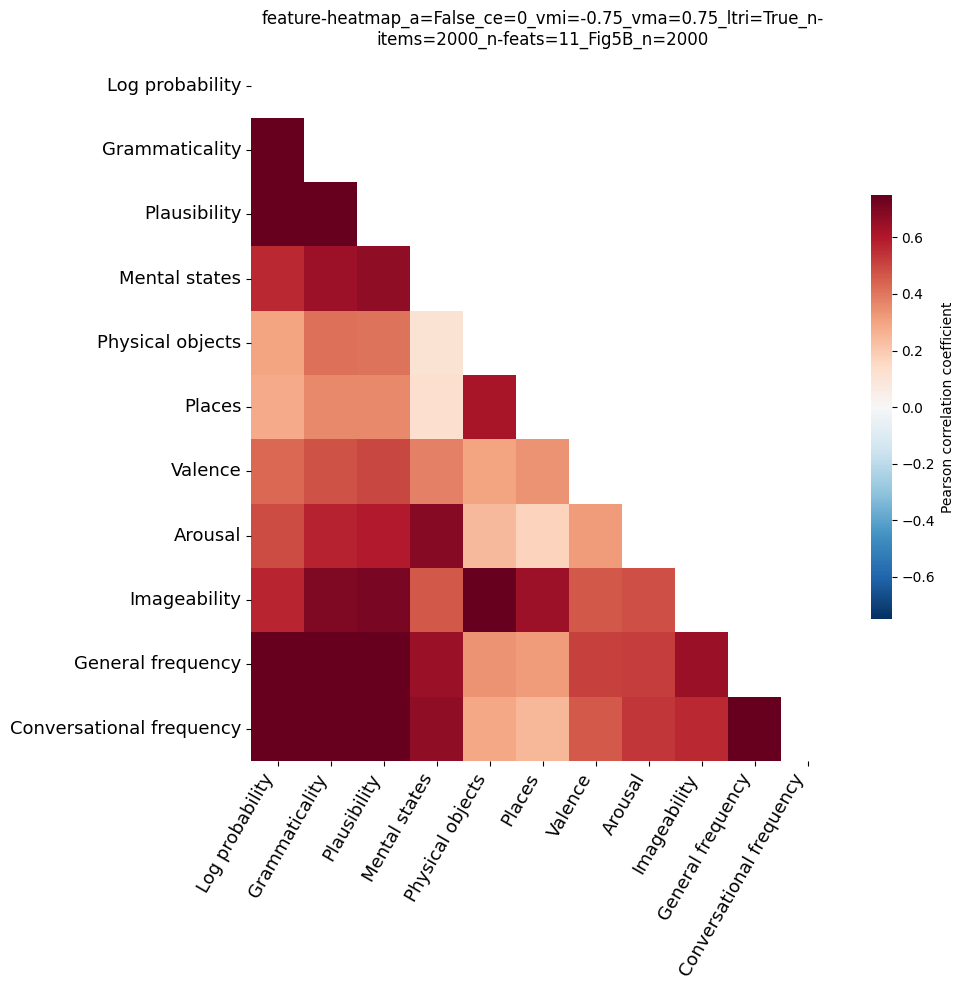

In [7]:
# Correlation of linguistic properties without BOLD response) across n=2,000 sentences (drive, suppress, baseline)
feature_heatmap(df_feats=df_roi_mean.drop(columns='response_target'),
                fname_save='Fig5B_n=2000',
                save=save,
                lower_triu=True,
                vmin=-0.75,
                vmax=0.75,
                annot=False, # For numbers, set annot=True
                PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                )

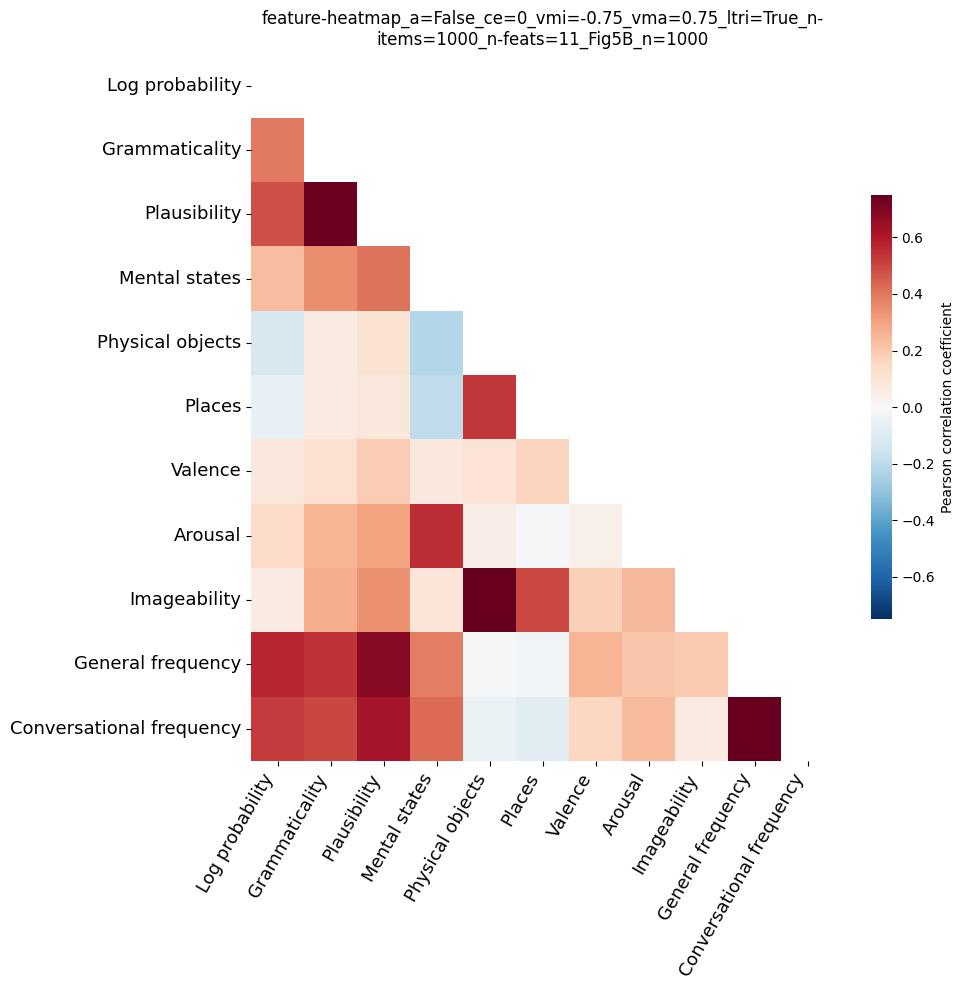

In [8]:
# Correlation of linguistic properties without BOLD response) across n=1,000 sentences (baseline)
feature_heatmap(df_feats=df_roi_B_mean.drop(columns='response_target'),
                fname_save='Fig5B_n=1000',
                save=save,
                lower_triu=True,
                vmin=-0.75,
                vmax=0.75,
                annot=False, # For numbers, set annot=True
                PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                )

## Figure 5C 

In [9]:
# Constrain to the lang_LH_netw ROI 
df_roi = df.query('roi == "lang_LH_netw"')

In [3]:
# Define the linguistic properties (features) of interest
feats_of_interest = [
    # Linguistic properties
    'log-prob-gpt2-xl_mean', 
    'rating_gram_mean',
    'rating_sense_mean',
    
    'rating_others_thoughts_mean',
    'rating_physical_mean',
    'rating_places_mean',

    'rating_valence_mean',
    'rating_arousal_mean',

    'rating_imageability_mean',

    'rating_frequency_mean',
    'rating_conversational_mean',
    ]

In [6]:
for feat in feats_of_interest:
    if feat.startswith('rating'):
        xlim = [0.5, 7.5]
    elif feat == 'log-prob-gpt2-xl_mean':
        xlim = [-14, -1]
    else:
        xlim = None

    ylim = [-3, 3]

    feat_scatter(df=df_roi,
                 target_UIDs=[str(x) for x in df_roi.target_UID.unique()],
                 x_val=feat,
                 y_val='response_target',
                 xlim=xlim,
                 ylim=ylim,
                 plot_aspect=1,
                 base_savestr='Fig5C',
                 add_best_fit_line=False,
                 save=save,
                 PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                )

NameError: name 'df_roi' is not defined

## Figure 5C insets

In [4]:
# Define the linguistic properties (features) of interest
feats_of_interest = [
    # Linguistic properties
    'log-prob-gpt2-xl_mean', 
    'rating_gram_mean',
    'rating_sense_mean',
    
    'rating_others_thoughts_mean',
    'rating_physical_mean',
    'rating_places_mean',

    'rating_valence_mean',
    'rating_arousal_mean',

    'rating_imageability_mean',

    'rating_frequency_mean',
    'rating_conversational_mean',
    ]

In [5]:
# Constrain to the lang_LH_netw ROI and average across sentences
df_roi_mean = groupby_coord(df=df.query('roi == "lang_LH_netw"'),
                            coord_col='item_id',
                            aggfunc='mean')

In [6]:
# Generate custom colormap to show how many datapoints we have in each bin
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["whitesmoke", "black"])
norm = plt.Normalize(vmin=0, vmax=1000)
# Package as a tuple and pass to function
cmap_norm = (cmap, norm)

Feature: log-prob-gpt2-xl_mean with min: -13.140351 and max: -1.9329304 and range: 11.2074206 and bin_size: 1.8679034333333335 (total bins: 6)
Number of unique values: 2000
Bin 1 edges: -13.1 - -11.3
Bin 2 edges: -11.3 - -9.4
Bin 3 edges: -9.4 - -7.5
Bin 4 edges: -7.5 - -5.7
Bin 5 edges: -5.7 - -3.8
Bin 6 edges: -3.8 - -1.9
Min number of data points in a bin: 12
Max number of data points in a bin: 995
Number of bins with less than 20 trials: 1. Setting to 0


/Users/gt/opt/anaconda3/envs/drive-suppress-brains/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


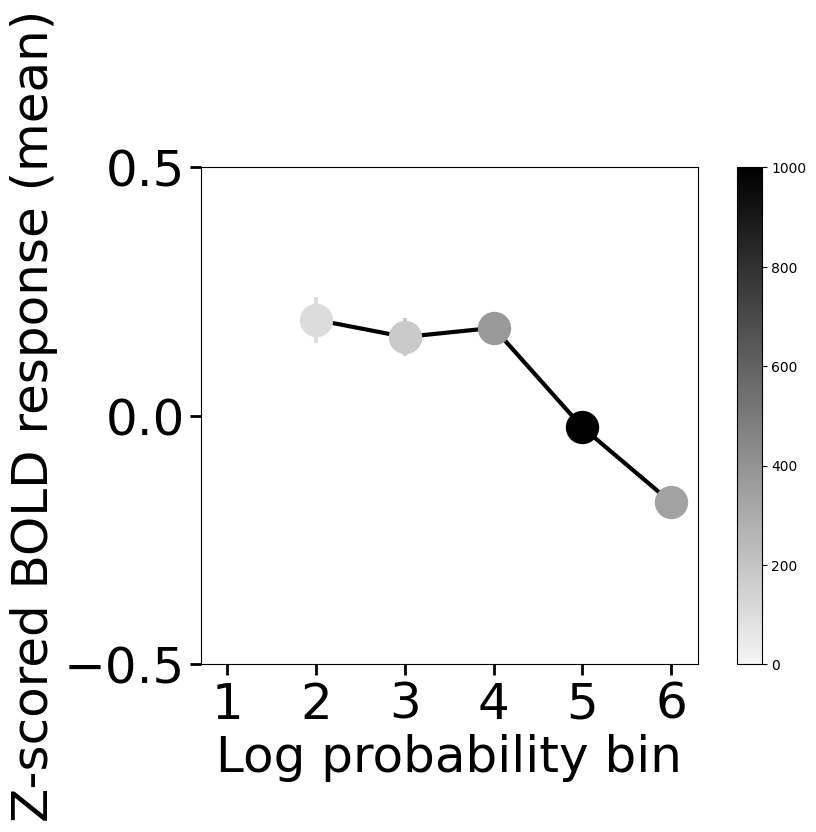

Feature: rating_gram_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 474
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 78
Max number of data points in a bin: 1098


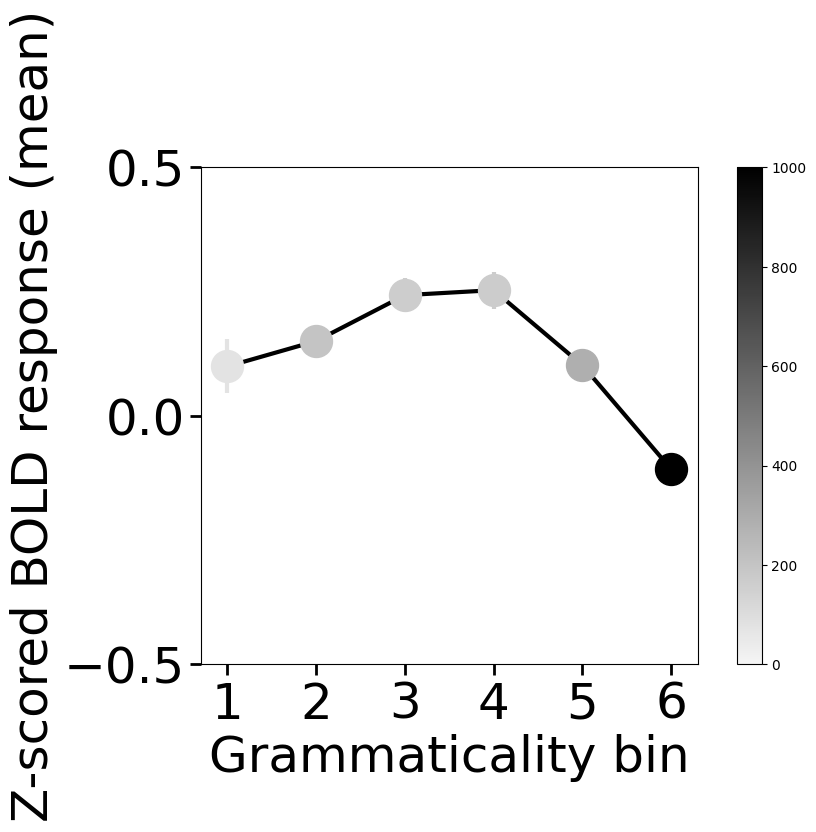

Feature: rating_sense_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 481
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 106
Max number of data points in a bin: 1185


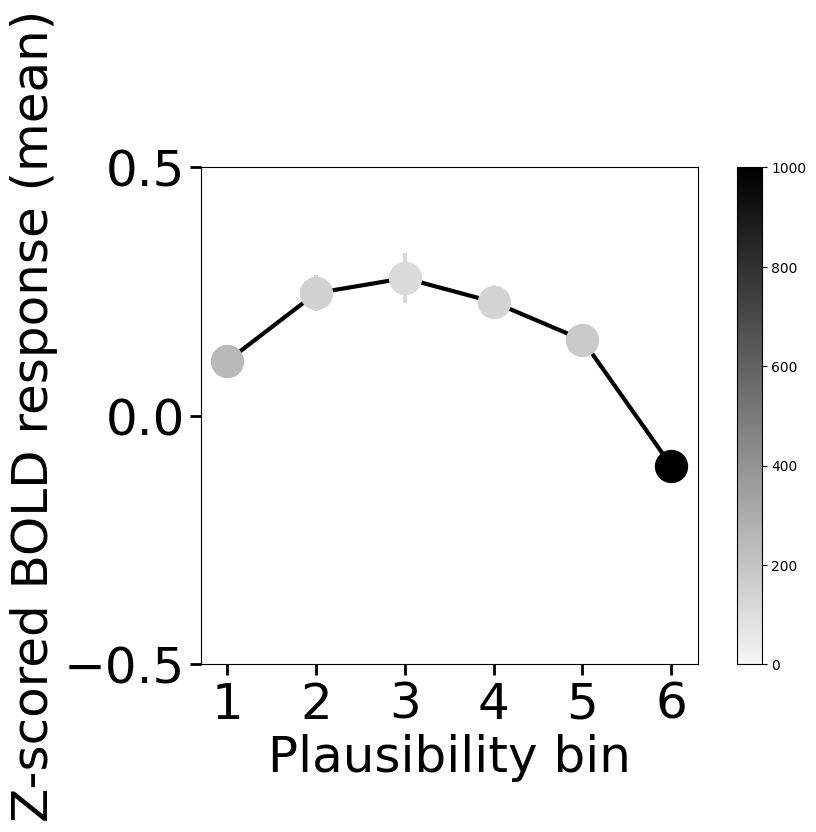

Feature: rating_others_thoughts_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 501
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 50
Max number of data points in a bin: 507


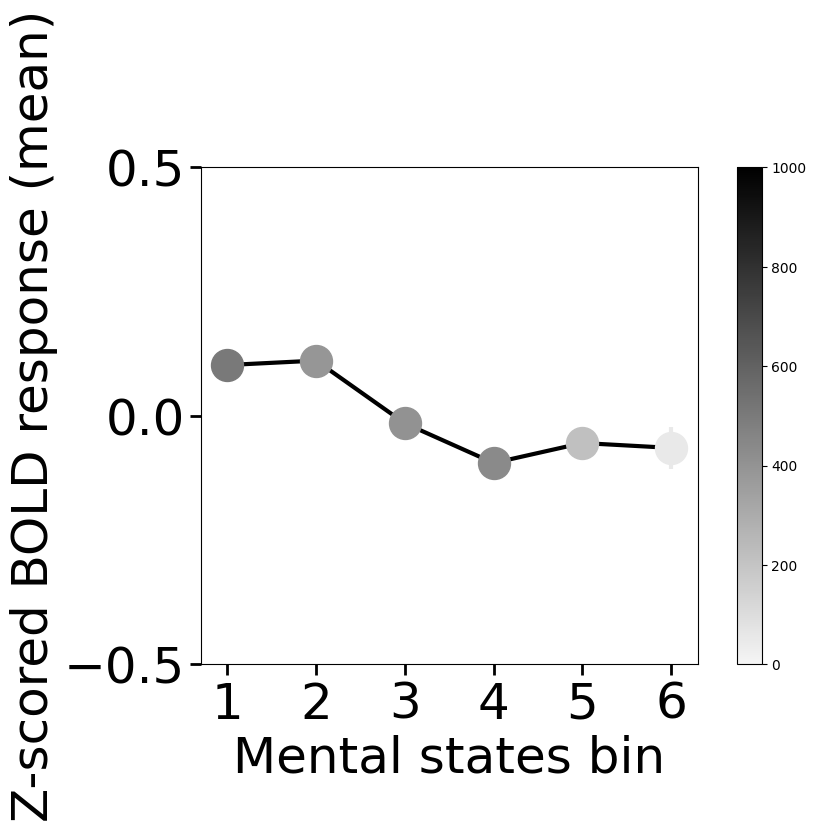

Feature: rating_physical_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 483
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 75
Max number of data points in a bin: 834


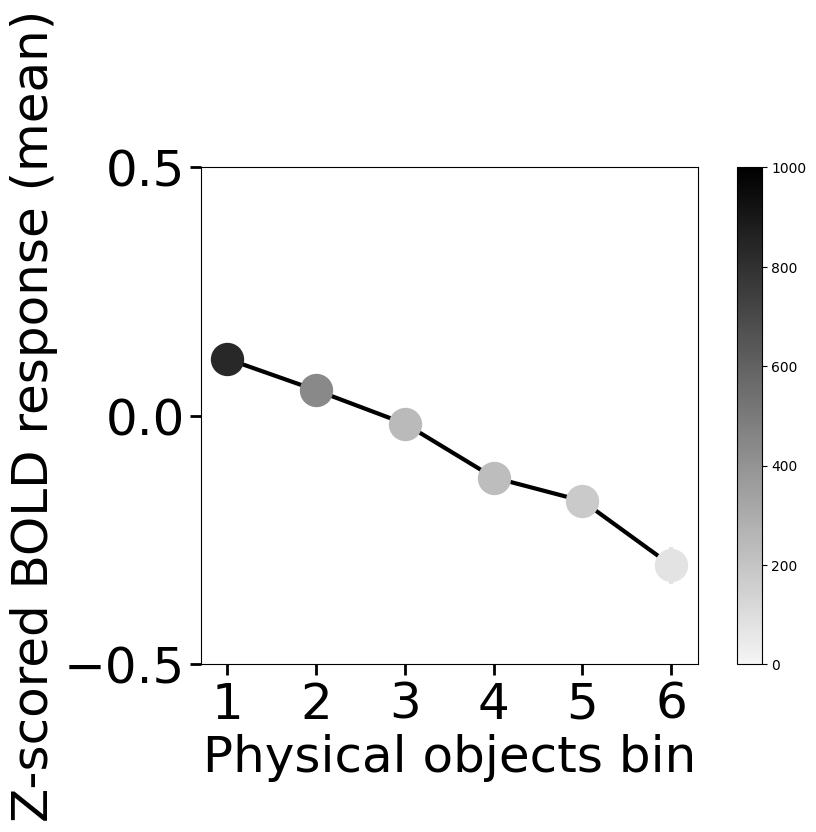

Feature: rating_places_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 409
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 42
Max number of data points in a bin: 1322


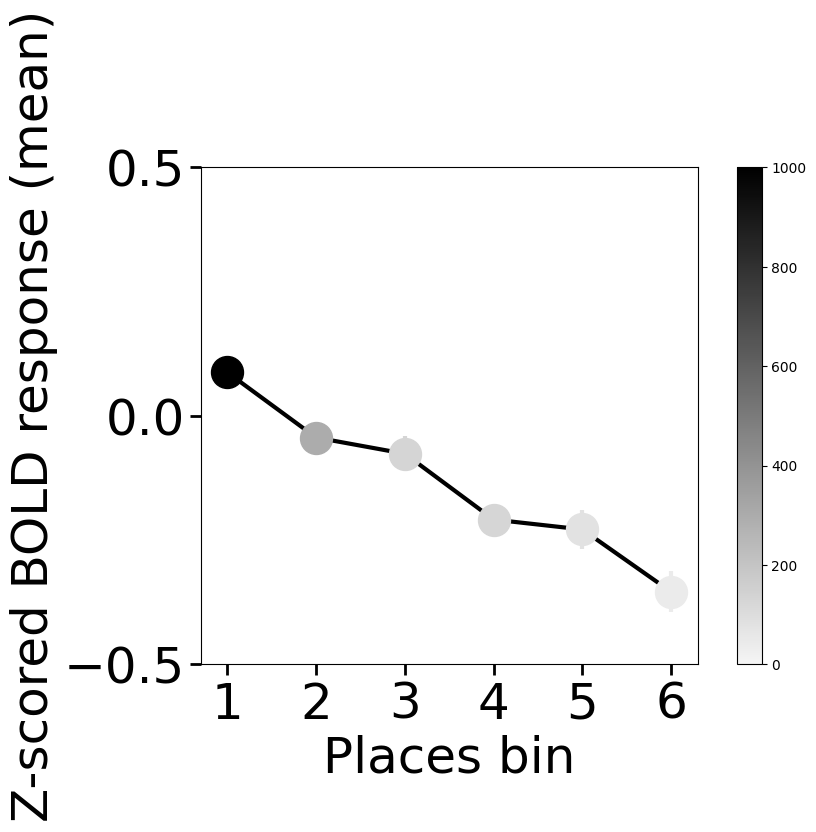

Feature: rating_valence_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 536
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 23
Max number of data points in a bin: 666


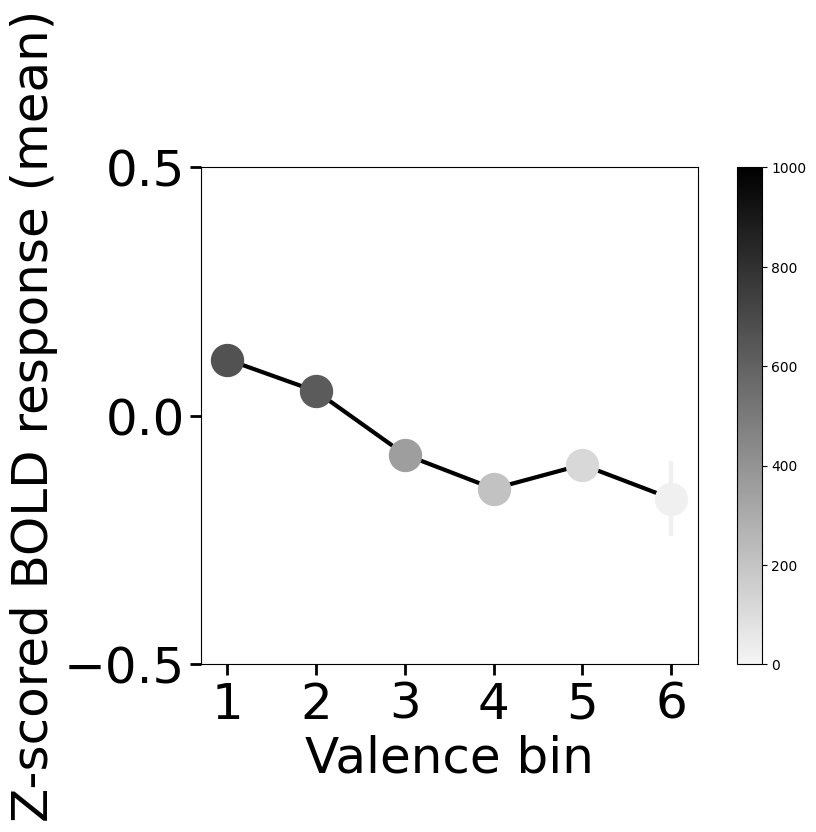

Feature: rating_arousal_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 413
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 1
Max number of data points in a bin: 661
Number of bins with less than 20 trials: 1. Setting to 0


/Users/gt/opt/anaconda3/envs/drive-suppress-brains/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


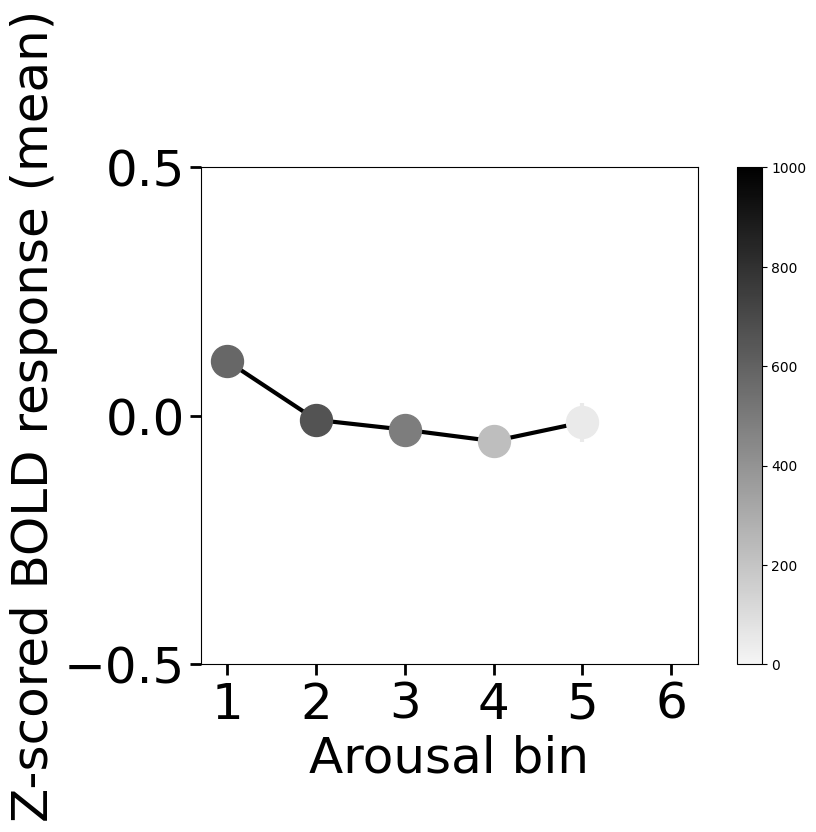

Feature: rating_imageability_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 476
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 180
Max number of data points in a bin: 549


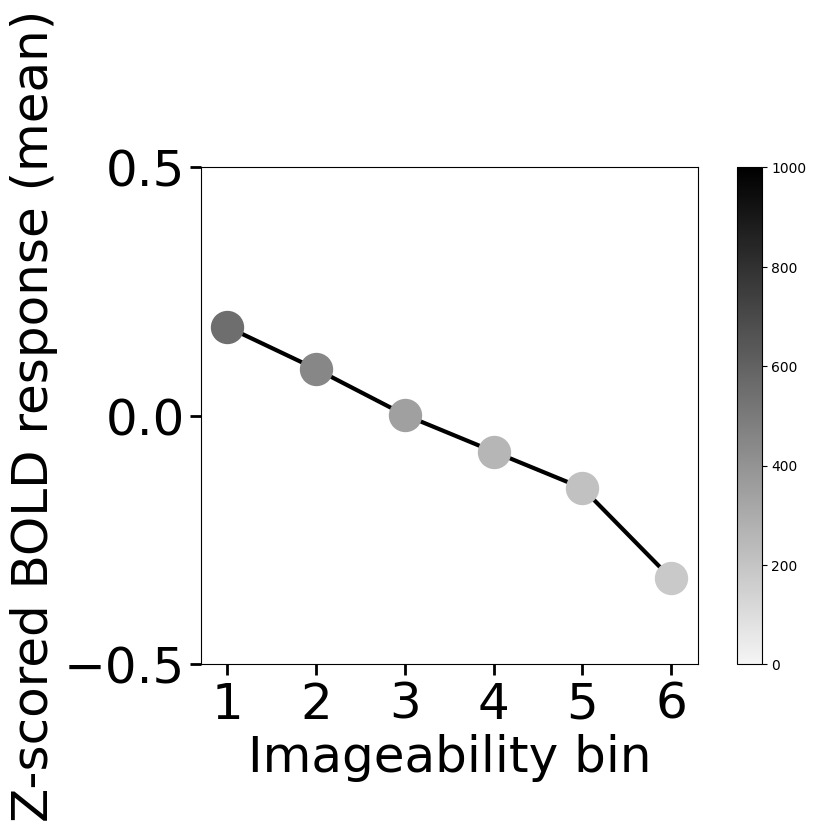

Feature: rating_frequency_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 585
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 218
Max number of data points in a bin: 570


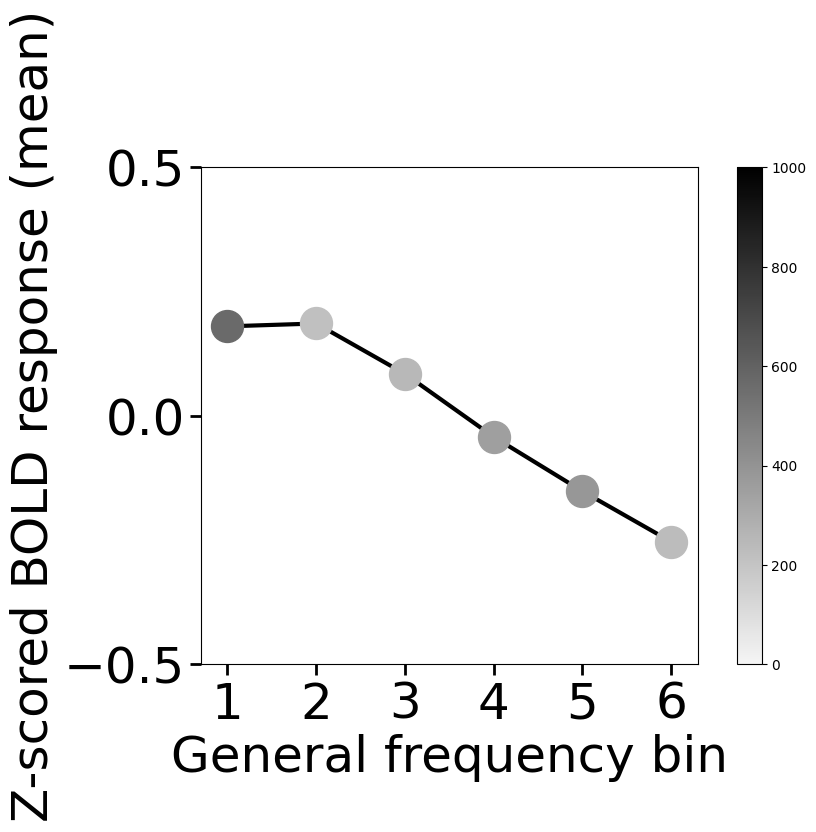

Feature: rating_conversational_mean with min: 1 and max: 7 and range: 6 and bin_size: 1.0 (total bins: 6)
Number of unique values: 560
Bin 1 edges: 1.0 - 2.0
Bin 2 edges: 2.0 - 3.0
Bin 3 edges: 3.0 - 4.0
Bin 4 edges: 4.0 - 5.0
Bin 5 edges: 5.0 - 6.0
Bin 6 edges: 6.0 - 7.0
Min number of data points in a bin: 211
Max number of data points in a bin: 531


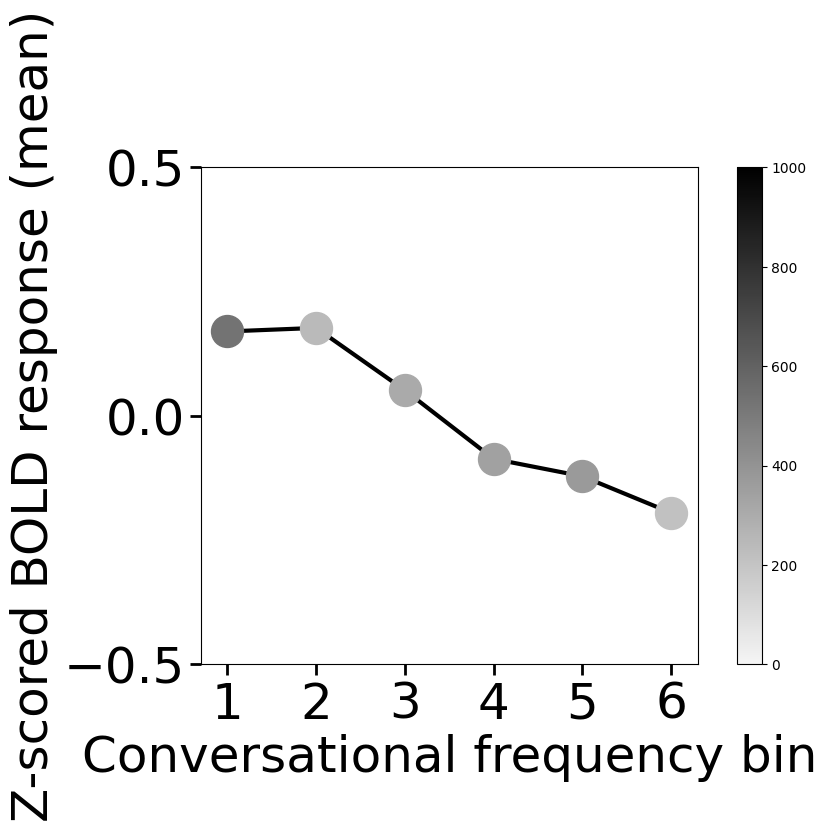

In [7]:
# Loop across features
for feat in feats_of_interest:

    # Bin the feature values
    df_item_bins = df_roi_mean.copy(deep=True)

    if feat.startswith('rating'):
        enforce_bin_edges = True # Ratings are in nice bins according to the Likert 7-point scale, so we want bins that go from 1-2, 2-3 etc.
    else:
        enforce_bin_edges = False

    df_item_bins = get_bin_range(df=df_item_bins,
                                 feat=feat,
                                 enforce_bin_edges=enforce_bin_edges,)


    # Plot the nice version without individual points and SEM as error
    df_agg_feat = binned_feat(df=df_item_bins,
                              x_val_feat=feat,
                              y_val='response_target',
                              yerr_type='sem',
                              min_trials=20,
                              plot_aspect=1,
                              ylim=[-0.5,0.5], 
                              ind_points=False,
                              custom_cmap=cmap_norm,
                              save=save,
                              base_savestr='Fig5_inset',
                              PLOTDIR=PLOTDIR, CSVDIR=CSVDIR,
                              )